In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from gensim.models import Word2Vec
from scipy.stats import mode
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import warnings
import gensim
import pickle
from scipy.io import mmread
warnings.filterwarnings(action='ignore')

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from scipy.io import mmwrite, mmread
from sklearn.metrics.pairwise import linear_kernel
from tqdm import tqdm
import re
import numpy as np
from gensim.models import Word2Vec

In [15]:
import re
from konlpy.tag import Okt
from nltk.corpus import stopwords
import nltk

# 리뷰데이터가 영어인 것만 남긴 데이터 불러오기

In [16]:
df_origin = pd.read_csv('./beer_only_eng.csv', index_col = 0)
df_origin

,ID,beer_name,date,grade,Aroma,Appearance,Flavor,Mouthfeel,Overall,beer_review,lang
0,"italianjohn(5,276)",Kloud Original Gravity,"September 6, 2021",2.8,5.0,3.0,5.0,3.0,12.0,Clear golden blonde pour with a thin white hea...,en
1,orda(284),Kloud Original Gravity,"August 29, 2021",3.9,10.0,5.0,10.0,5.0,9.0,Appearance: golden amber; slight head\nTaste: ...,en
2,"Radek Kliber(8,065)",Kloud Original Gravity,"June 5, 2021",2.4,6.0,3.0,4.0,2.0,9.0,"Bottle 330 ml \n\nAroma: nice, fresh, on dry s...",en
3,"geologyguy(2,575)",Kloud Original Gravity,"May 26, 2021",2.3,4.0,3.0,4.0,3.0,9.0,Smell is light of malt...taste is a that malt ...,en
4,Wolff90(203),Kloud Original Gravity,"February 16, 2021",1.0,1.0,1.0,1.0,1.0,6.0,Rating copied from Untappd. Had while flying A...,en
...,...,...,...,...,...,...,...,...,...,...,...
83186,bourne(161),Cafri,"March 21, 2006",1.3,2.0,2.0,3.0,2.0,4.0,I didnt think this was beer when I bought it. ...,en
83187,curvedbeer(11),Cafri,"November 6, 2005",1.0,2.0,3.0,1.0,1.0,3.0,Of all of the commercially brewed beers I’ve t...,en
83188,"tomciccateri(1,033)",Cafri,"September 5, 2007",2.2,3.0,3.0,4.0,2.0,10.0,"From a can onboard a KAL flight. 4.2%, with no...",en
83189,"Papsoe(25,039)",Cafri,"June 13, 2005",2.1,5.0,2.0,4.0,2.0,8.0,(Bottle 48 cl) Again - for Korea - this beauti...,en


In [17]:
df_origin[df_origin['beer_name'] == 'Carlsberg Pilsner']

,ID,beer_name,date,grade,Aroma,Appearance,Flavor,Mouthfeel,Overall,beer_review,lang
37592,Arbitrage411(162),Carlsberg Pilsner,"October 24, 2022",2.9,4.0,3.0,5.0,3.0,14.0,Gentle off white head forms over a pale gold i...,en
37593,Itstasty(263),Carlsberg Pilsner,"September 22, 2022",2.8,5.0,3.0,6.0,3.0,11.0,"Bottle.\nNo great flavours, but on a red hot d...",en
37598,MacNJ(378),Carlsberg Pilsner,"February 28, 2022",1.0,3.0,3.0,1.0,1.0,2.0,Poured from a tall can into a Pilsner glass. V...,en
37605,JDsz5(614),Carlsberg Pilsner,"August 7, 2021",2.3,5.0,2.0,5.0,2.0,9.0,Aroma 5. Appearance 2. Taste 5. Palate 2. Over...,en
37606,TrappistExports38(266),Carlsberg Pilsner,"August 2, 2021",1.5,3.0,2.0,3.0,2.0,5.0,0.45l bottle from Chisinau. Light gold colour ...,en
...,...,...,...,...,...,...,...,...,...,...,...
39370,Deimos(81),Carlsberg Pilsner,"February 26, 2001",3.1,5.0,3.0,6.0,3.0,14.0,"Finally, a Euro Import that's not skunked. Go...",en
39371,"Oakes(28,107)",Carlsberg Pilsner,"January 17, 2001",2.7,5.0,2.0,6.0,3.0,11.0,"Clean, malt-accented. It seems all Danish lage...",en
39373,"Gusler(2,653)",Carlsberg Pilsner,"January 19, 2003",2.8,6.0,3.0,6.0,3.0,10.0,The first time I sampled this beer was on Octo...,en
39374,Sammys(427),Carlsberg Pilsner,"September 7, 2000",2.4,4.0,3.0,5.0,3.0,9.0,"""Probably the best beer in the world?"" Nah. A...",en


 # beer CBF 전처리 

## 데이터 불러오기

In [19]:
df = pd.read_csv('./beer_only_eng.csv', index_col = 0) 
df

,ID,beer_name,date,grade,Aroma,Appearance,Flavor,Mouthfeel,Overall,beer_review,lang
0,"italianjohn(5,276)",Kloud Original Gravity,"September 6, 2021",2.8,5.0,3.0,5.0,3.0,12.0,Clear golden blonde pour with a thin white hea...,en
1,orda(284),Kloud Original Gravity,"August 29, 2021",3.9,10.0,5.0,10.0,5.0,9.0,Appearance: golden amber; slight head\nTaste: ...,en
2,"Radek Kliber(8,065)",Kloud Original Gravity,"June 5, 2021",2.4,6.0,3.0,4.0,2.0,9.0,"Bottle 330 ml \n\nAroma: nice, fresh, on dry s...",en
3,"geologyguy(2,575)",Kloud Original Gravity,"May 26, 2021",2.3,4.0,3.0,4.0,3.0,9.0,Smell is light of malt...taste is a that malt ...,en
4,Wolff90(203),Kloud Original Gravity,"February 16, 2021",1.0,1.0,1.0,1.0,1.0,6.0,Rating copied from Untappd. Had while flying A...,en
...,...,...,...,...,...,...,...,...,...,...,...
83186,bourne(161),Cafri,"March 21, 2006",1.3,2.0,2.0,3.0,2.0,4.0,I didnt think this was beer when I bought it. ...,en
83187,curvedbeer(11),Cafri,"November 6, 2005",1.0,2.0,3.0,1.0,1.0,3.0,Of all of the commercially brewed beers I’ve t...,en
83188,"tomciccateri(1,033)",Cafri,"September 5, 2007",2.2,3.0,3.0,4.0,2.0,10.0,"From a can onboard a KAL flight. 4.2%, with no...",en
83189,"Papsoe(25,039)",Cafri,"June 13, 2005",2.1,5.0,2.0,4.0,2.0,8.0,(Bottle 48 cl) Again - for Korea - this beauti...,en


In [20]:
df.drop_duplicates(inplace=True) # 중복값제거

In [21]:
df2 = df[['beer_name','beer_review']]
df2

,beer_name,beer_review
0,Kloud Original Gravity,Clear golden blonde pour with a thin white hea...
1,Kloud Original Gravity,Appearance: golden amber; slight head\nTaste: ...
2,Kloud Original Gravity,"Bottle 330 ml \n\nAroma: nice, fresh, on dry s..."
3,Kloud Original Gravity,Smell is light of malt...taste is a that malt ...
4,Kloud Original Gravity,Rating copied from Untappd. Had while flying A...
...,...,...
83186,Cafri,I didnt think this was beer when I bought it. ...
83187,Cafri,Of all of the commercially brewed beers I’ve t...
83188,Cafri,"From a can onboard a KAL flight. 4.2%, with no..."
83189,Cafri,(Bottle 48 cl) Again - for Korea - this beauti...


In [22]:
df_sum = pd.DataFrame(df2.groupby('beer_name').sum())
df_sum

,beer_review
beer_name,
7Bräu Gompyo Wheatbeer,(Can) Pours clear pale golden yellow with loos...
ARK Seoulite Ale,Darker amber with smooth yet aggressive creamy...
Asahi Super Dry,Golden with quickly disintegrating white head....
Asahi Super Dry Black,"Dark copper red beer , with a big tan coloured..."
Bavaria 8.6 (Original),"Can. Clear golden, white head. Candy, sugary a..."
...,...
Tsingtao,500ml can. Pours a clear pale gold with a thin...
Tsingtao Wheat Beer,"Intense banana and clove aromas, pale yellow w..."
Victoria Bitter,Works very well above 32 degrees Celcius and o...


## 특정 품사만 남기기 (명사 동사 형용사만 남기기)

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\X1Carbon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stops = set(stopwords.words('english'))

In [29]:
# nltk = nltk.word_tokenize() #tokenizer 로드
TAG_NORMAL = {'JJR', 'JJS', 'NN', 'NNS', 'NNP','NNP','NNPS','RB','RBR','RBS','VBD','VB','VBN','VBG'}
df_fin = pd.DataFrame()

cleaned_sentences = []
count = 0
token_stop = []

for sentence in tqdm(df_sum.beer_review):
    sentences = re.sub(r"[^a-zA-Z0-9]"," ", sentence) # 한글이 아닌 문자는 공백으로 표시
    sentences = sentences.lower()
    new_string = sentences.replace('  ',' ')
    token = nltk.word_tokenize(new_string) # 토크화
    token_stop = [word for word in token if not word in stops]
    token_stop = nltk.pos_tag(token_stop)
    df_token = pd.DataFrame(token_stop, columns=['word', 'class'])
    df_cleaned_token = df_token[df_token['class'].isin(TAG_NORMAL)]['word']  # TAG_NORMAL 에 있는 품사만 뽑아내는 작업
    cleaned_sentence: str = ' '.join(df_cleaned_token)  # 단어들 이어붙이기
    df_clean = pd.DataFrame([cleaned_sentence], columns = ['review'])
    df_fin = pd.concat([df_fin, df_clean])

  0%|                                                                                           | 0/87 [00:00<?, ?it/s]


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle[0m

  Searched in:
    - 'C:\\Users\\X1Carbon/nltk_data'
    - 'C:\\Users\\X1Carbon\\.conda\\envs\\mlproject\\nltk_data'
    - 'C:\\Users\\X1Carbon\\.conda\\envs\\mlproject\\share\\nltk_data'
    - 'C:\\Users\\X1Carbon\\.conda\\envs\\mlproject\\lib\\nltk_data'
    - 'C:\\Users\\X1Carbon\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
df_fin.reset_index(drop = True, inplace = True)
df_fin

In [ ]:
df_fin['beer'] = df_sum.index.to_list()

In [ ]:
df_fin = df_fin[['beer','review']]
df_fin

In [ ]:
df_fin.to_csv('./data/beer_CBF.csv')

In [31]:
df_review = pd.read_csv('./beer_CBF.csv', index_col = 0)
df_review

,beer,review
0,7Bräu Gompyo Wheatbeer,pours yellow loose lived head aroma peach flav...
1,ARK Seoulite Ale,darker amber yet creamy foam creamy foam caram...
2,Asahi Super Dry,quickly disintegrating head sweet malty notes ...
3,Asahi Super Dry Black,copper beer tan coloured head toasty malt arom...
4,Bavaria 8.6 (Original),head candy aroma corn candy alcohol bought mos...
...,...,...
82,Tsingtao,pours gold fizzy lived head lacing aroma malt ...
83,Tsingtao Wheat Beer,banana clove aromas pale hint turbidities swee...
84,Victoria Bitter,works well degrees neutrals world coloured fai...
85,Volfas Engelman Grünberger Hefeweizen,pale yellow colour dense head lasts minutes cl...


In [35]:
df_review[df_review.beer=='Hite Beer']['review']

37    hite first ever barbecue houston food beer bes...
Name: review, dtype: object

In [36]:
df_origin.beer_review.iloc[:10]

0    Clear golden blonde pour with a thin white hea...
1    Appearance: golden amber; slight head\nTaste: ...
2    Bottle 330 ml \n\nAroma: nice, fresh, on dry s...
3    Smell is light of malt...taste is a that malt ...
4    Rating copied from Untappd. Had while flying A...
5    Strong hoppy flavor. Bavarian style. Ok but no...
6    Poured from 330mL bottle. Clear gold with whit...
7    Bottle. Tastes like dough, corn, grass, smooth...
8    Pours with a brilliant clear gold body and a m...
9    Small can from a supermarket in Phnom Penh. Po...
Name: beer_review, dtype: object

# 합친 단어를 다시 분리시켜주기

In [37]:
doc = []
for sentence in tqdm(df_origin.beer_review):
    sentences = re.sub(r"[^a-zA-Z0-9]"," ", sentence) # 한글이 아닌 문자는 공백으로 표시
    sentences = sentences.lower()
    new_string = sentences.replace('  ',' ')
    doc.append([new_string])

100%|█████████████████████████████████████████████████████████████████████████| 72310/72310 [00:01<00:00, 37399.47it/s]


In [38]:
doc2 = np.array(doc)
doc2.shape

(72310, 1)

In [39]:
df_origin['clean'] = doc2

In [40]:
df_origin['clean']

0        clear golden blonde pour with a thin white hea...
1        appearance golden amber slight head taste dece...
2        bottle 330 ml  aroma nice fresh on dry side yo...
3        smell is light of malt  taste is a that malt t...
4        rating copied from untappd had while flying as...
                               ...                        
83186    i didnt think this was beer when i bought it  ...
83187    of all of the commercially brewed beers i ve t...
83188    from a can onboard a kal flight 4 2  with no h...
83189     bottle 48 cl again  for korea  this beautiful...
83190    probably my favorite korean beer but not as av...
Name: clean, Length: 72310, dtype: object

## TFIDF 모델 생성

TF-IDF(Term Frequency-Inverse Document Frequency)는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법

우선 DTM을 만든 후, TF-IDF 가중치를 부여

TF-IDF는 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰일 수 있음

TF-IDF는 TF와 IDF를 곱한 값을 의미하는데 이를 식으로 표현. 문서를 d, 단어를 t, 문서의 총 개수를 n이라고 표현할 때 TF, DF, IDF는 각각 다음과 같이 정의.

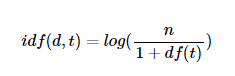

TF(Term Frequency) : 특정한 단어가 문서 내에 얼마나 자주 등장하는지

DF(Document Frequency) : 단어가 문서내에서 얼마나 흔하게 등장하는지

IDF(Inverse Document Frequency) : DF의 역수

In [41]:
Tfidf = TfidfVectorizer(sublinear_tf=True,ngram_range=(1,2))
Tfidf_matrix = Tfidf.fit_transform(
    df_origin['clean'])
with open('tfidf.pickle', 'wb') as f:
    pickle.dump(Tfidf, f)
mmwrite('tfidf.mtx', Tfidf_matrix)

## Word2Vec 모델 생성

Word2Vec을 미리 학습시켜 놓고 미리 학습한 모델을 불러옴

Word2Vec : 단어를 바로 벡터로 변환 (벡터로 바꾸어서 유사도를 계산 - 분산 표현)

In [42]:
import pandas as pd
from gensim.models import Word2Vec

# 파일 불러오기
review_words = pd.read_csv(
    "./beer_CBF.csv", index_col=0)
review_words.dropna(inplace = True)
clean_token_review = list(review_words['review'])

cleaned_tokens = []

# 토큰별로 변환
for sentence in clean_token_review:
    token = sentence.split(' ')
    cleaned_tokens.append(token)
print(len(cleaned_tokens))
print(len(sentence))
# 모델링 및 파라미터 조정
embedding_model = Word2Vec(cleaned_tokens,   # 벡터 사이즈 -> 차원 수
                          window=4, min_count=20,ns_exponent=0.75,
                           # ns_exponent -> 1.0 빈도에 정확히 비례하여 표본 추출,
                           # 0.0 값은 모든 단어를 동일하게 표본 추출하며 
                           # 음수 값은 고빈도 단어보다 저빈도 단어를 표본 추출
                          workers=-1,sg=1)
embedding_model.save('word2VecModel.model')

87
211561


In [43]:
df_review_one_sentence = pd.read_csv(
    './beer_CBF.csv', index_col=0)
def getRecommendation(cosine_sim):
    simScores = list(enumerate(cosine_sim[-1]))
    simScores = sorted(simScores, key=lambda x:x[1],
                       reverse=True)
    simScores = simScores[:10]
    movieidx = [i[0] for i in simScores]
    RecMovielist = df_review_one_sentence.iloc[movieidx]
    return RecMovielist.beer

# movie_idx = df_review_one_sentence[
#     df_review_one_sentence[
#         'title']=='기생충 (PARASITE)'].index[0]
#movie_idx = 127
#print(df_review_one_sentence.iloc[movie_idx,0])
embedding_model = Word2Vec.load('./model/word2VecModel.model')
key_word = 'fruit'
sentence = [key_word] * 10
# wv.vocab
if key_word in embedding_model.wv.key_to_index:
    sim_word = embedding_model.wv.most_similar(key_word, topn=10)
    #print(sim_word)
    labels = []
    for label, _ in sim_word:
        labels.append(label)
    print(labels)

    for i, word in enumerate(labels):
        sentence += [word] * (9-i)

sentence = ' '.join(sentence)
print(sentence)

# Tfidf = TfidfVectorizer(sublinear_tf=True)
# Tfidf_matrix = Tfidf.fit_transform(
#     df_review_one_sentence['review'])

with open("./model/tfidf.pickle", "rb") as fr:
    Tfidf = pickle.load(fr)
Tfidf_matrix = mmread("./model/tfidf.mtx")

sentence_vec = Tfidf.transform([sentence])
cosine_sim = linear_kernel(sentence_vec,
                           Tfidf_matrix)

recommendation = getRecommendation(cosine_sim)
print(recommendation)

['enjoyment', 'lived', 'cidery', 'pure', 'citrus', 'beans', 'island', 'mild', 'confused', 'teeth']
fruit fruit fruit fruit fruit fruit fruit fruit fruit fruit enjoyment enjoyment enjoyment enjoyment enjoyment enjoyment enjoyment enjoyment enjoyment lived lived lived lived lived lived lived lived cidery cidery cidery cidery cidery cidery cidery pure pure pure pure pure pure citrus citrus citrus citrus citrus beans beans beans beans island island island mild mild confused
48                           Jeju Wit Ale
19          Edelweiss Weissbier Snowfresh
37                              Hite Beer
55                 Kronenbourg 1664 Blanc
12                              Budweiser
0                  7Bräu Gompyo Wheatbeer
31    Guinness Original 4.2% (Ireland/UK)
39                    Hite D (Dry Finish)
4                  Bavaria 8.6 (Original)
25              Erdinger Weissbier Dunkel
Name: beer, dtype: object
